<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentran los archivos:
    - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`). Aunque varios de estos links están rotos. 
    - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   

In [1]:
import pandas as pd
df_artistas = pd.read_table("data/artists.dat")
df_artistas = df_artistas[['id','name']]
df_artistas.rename(columns = {'id':'artista_id', 'name':'nombre_artista'}, inplace = True)
df_artistas

df_usuario_artistas = pd.read_table("data/user_artists.dat")
df_usuario_artistas.rename(columns = {'userID':'usuario_id', 'artistID':'artista_id', 'weight':'nro_reproducciones'}, inplace = True)
db_musica= df_usuario_artistas.merge(df_artistas,how='inner',left_on='artista_id', right_on='artista_id')
print(len(db_musica['usuario_id'].unique()),len(db_musica['artista_id'].unique()))
db_musica


1892 17632


,usuario_id,artista_id,nro_reproducciones,nombre_artista
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran
...,...,...,...,...
92829,2100,18726,337,Nyktalgia
92830,2100,18727,297,Atsakau niekadA
92831,2100,18728,281,Domantas Razauskas
92832,2100,18729,280,Atalyja


# Análisis

- Se lee el archivo artists.dat usando Pandas.read_table en una dataframe llamada df_artistas. Se renombran las columnas. De igual manera, se carga  el archivo user_artists.dat en un dataframe llamado df_usuarios_artistas y se renombran las columnas.

- Se hace un inner join entre los dos dataframes sobre la columna artista_id. Este inner join significa que hace un cruce entre los  valores de artista_id que hacen match en lo dos conjuntos(dataframes). Con este tipo join , se garantiza que no hay artistas que no tienen reproducciones en el dataset final. El dataset final es llamado db_musica. Básicamente, los artistas que no han sido reproducidos por ningún usuario no deberian ser tenidos en cuenta. Y desde aqui ya se eliminaron con el inner join.

- Hay 1892 usuarios que tienen reproducciones
- Hay 17632 artistas que han sido reproducidos al menos una vez

### 2. Análisis descriptivo de los datos. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuáles son los 10 artistas con más reproducciones en números absolutos y en porcentajes? Presente sus resultados usando tablas y/o gráficas.

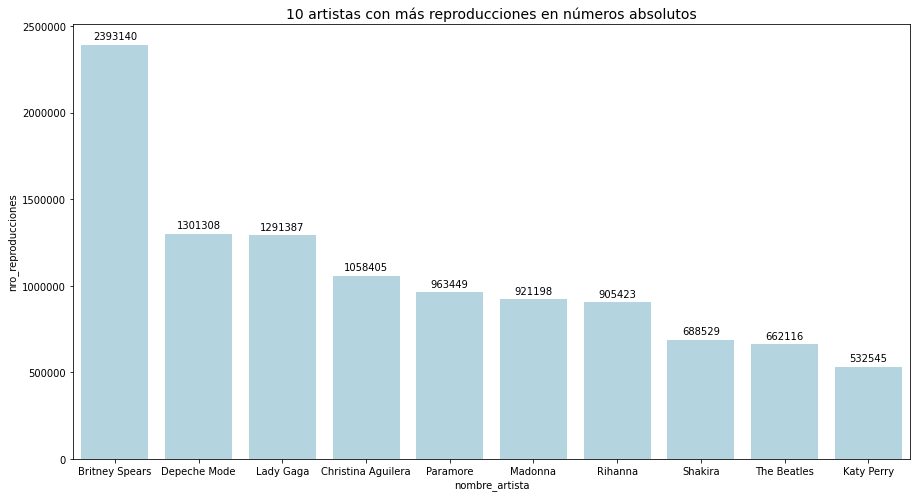

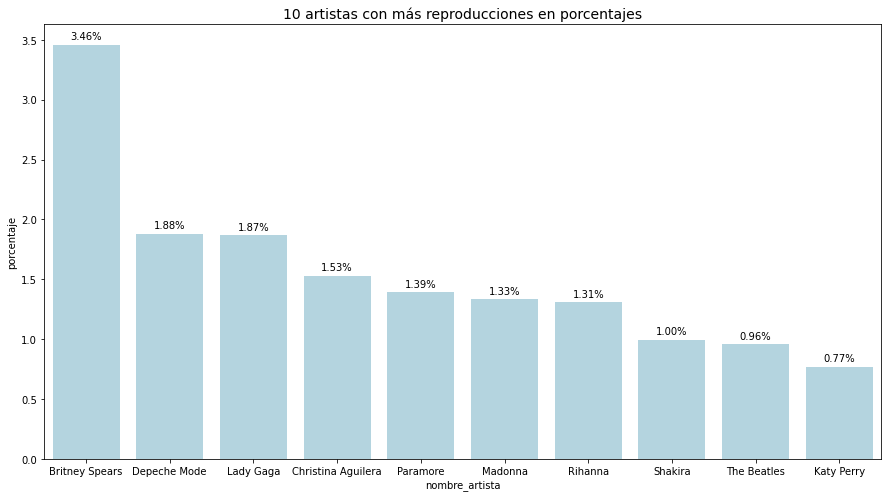

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sb

# Se agrupa db_musica por artista_id y se hace una suma de cada grupo.
df = db_musica.groupby('artista_id')['nro_reproducciones'].sum()

#Se crea un datframe despues del agrupamiento y se cruza con df_artitas para obter los nombrs de los artistas 
df=df.to_frame().reset_index().merge(df_artistas,how='inner',left_on='artista_id', right_on='artista_id')
# Se calcula el porcentaje de reproduccion de ese artista
df['porcentaje']= df['nro_reproducciones']*100/(df['nro_reproducciones'].sum())
# Se ordena de maypir a menor
df=df.sort_values('nro_reproducciones',ascending = False)
# Se obtiene los 10  artitasas con mayores reproducciones.
df=df.head(10)


#Plot 10 artistas con más reproducciones en números absolutos
fig, ax = plt.subplots(figsize=(15, 8))
ax.ticklabel_format(style='plain')
plots = sb.barplot(x="nombre_artista", y="nro_reproducciones", data=df, color='lightblue',ax=ax)
for bar in plots.patches:
    plots.annotate( format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),  textcoords='offset points')
plt.title("10 artistas con más reproducciones en números absolutos",fontsize = 14)
plt.show()


#Plot 10 artistas con más reproducciones en porcentajes
fig, ax = plt.subplots(figsize=(15, 8))
ax.ticklabel_format(style='plain')
plots = sb.barplot(x="nombre_artista", y="porcentaje", data=df, color='lightblue',ax=ax)
for bar in plots.patches:
    plots.annotate( format(bar.get_height(), '.2f') + '%',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),  textcoords='offset points')
plt.title('10 artistas con más reproducciones en porcentajes',fontsize = 14)
plt.show()


# Análisis

- Se agrupa db_musica por artista_id y se hace una suma de cada grupo.
- Se crea un dataframe despues del agrupamiento y se cruza con df_artistas para obtener los nombres de los artistas.
- Se calcula el porcentaje de reproduccion de cada artista y se crea una nuva columna en el dataframe.

- Se obtienen los 10  artistas con mayores reproducciones DataFrame.head



#### 2.2 ¿Cuáles son los 10 artistas con mas porcentaje de usuarios que  al menos  reprodujeron una vez sus canciones? Presente sus resultados usando tablas y/o gráficas.

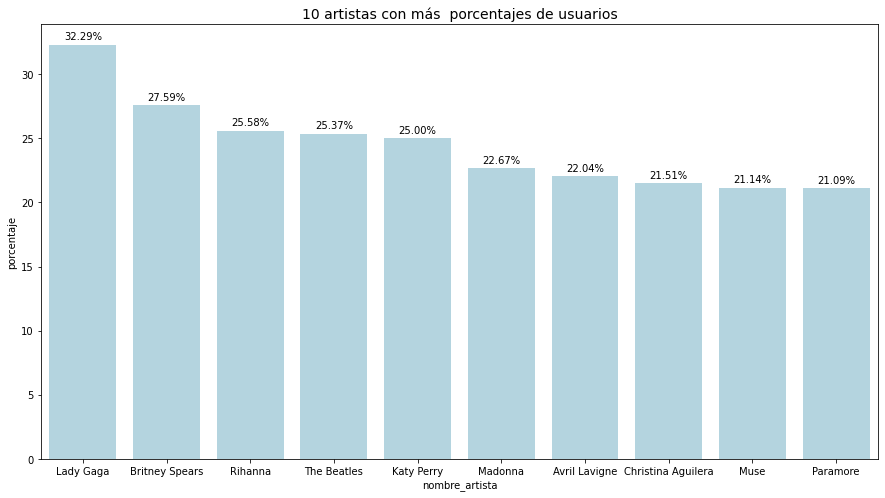

In [3]:
#Dado que db_musica tiene solamente artistas que al menos han sido reproducidos una vez como resultado del inner join, entonces
# se agrupa artista_id y se extrae el conteo de usuarios
df= db_musica.groupby('artista_id')['usuario_id'].count()

#Se crea un nueva dataframe desde el agrupamiento.
df=df.to_frame(name='total_usuarios').reset_index().merge(df_artistas,how='inner',left_on='artista_id', right_on='artista_id')

#Se calcular el porcentaje de usuarios
#df['porcentaje']= df['total_usuarios']*100/(df['total_usuarios'].sum())
df['porcentaje']= df['total_usuarios']*100/(len(db_musica['usuario_id'].unique()))
# Se ordena el dataframe por oder descendente por total usuarios
df=df.sort_values('total_usuarios',ascending = False)
df=df.head(10)

#Plot 10 artistas con más  porcentajes de usuarios
fig, ax = plt.subplots(figsize=(15, 8))
ax.ticklabel_format(style='plain')
plots = sb.barplot(x="nombre_artista", y="porcentaje", data=df, color='lightblue',ax=ax)
for bar in plots.patches:
    plots.annotate( format(bar.get_height(), '.2f') + '%',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),  textcoords='offset points')
plt.title('10 artistas con más  porcentajes de usuarios',fontsize = 14)
plt.show()



# Análisis 
- Dado que db_musica tiene solamente artistas que al menos han sido reproducidos una vez como resultado del inner join inicial, entonces se agrupa artista_id y se extrae el conteo de usuarios.

- Se crea un dataframe despues del agrupamiento y se cruza con df_artistas para obtener los nombres de los artistas.

- Se calcula el porcentaje de usuarios.

- Se obtienen los 10 artistas con mayor cantidad de usuarios


#### 2.3 Para el usuario 8 (`userID==8`) encuentre los 10 artistas que más reproduce. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha?

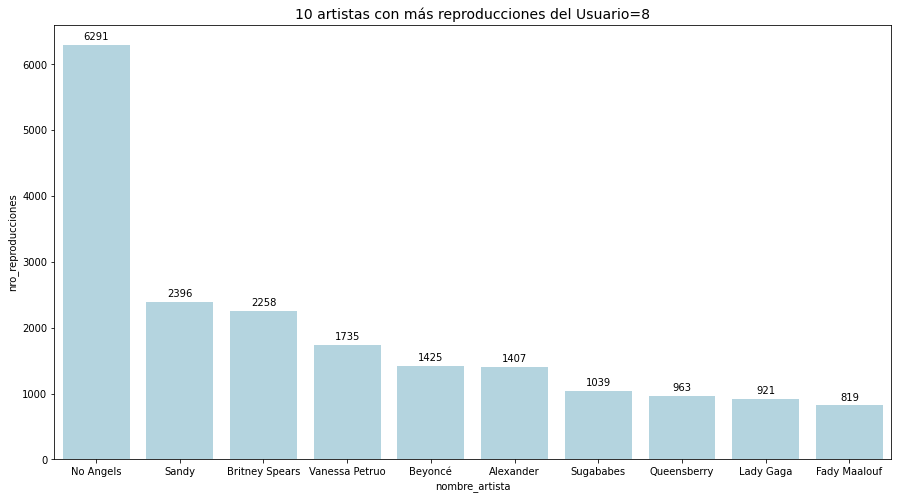

In [4]:
# Fltrar db_musica por usuario id=8
df= db_musica[db_musica['usuario_id']==8]
# Ordenar de mayor a menor cantidad de reproducciones
df=df.sort_values('nro_reproducciones',ascending = False)
# Obtener los 10 artitas con mayor cantidad de reproducciones por este artista
df=df.head(10)



fig, ax = plt.subplots(figsize=(15, 8))
ax.ticklabel_format(style='plain')
plots = sb.barplot(x="nombre_artista", y="nro_reproducciones", data=df, color='lightblue',ax=ax)
for bar in plots.patches:
    plots.annotate( format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),  textcoords='offset points')
plt.title("10 artistas con más reproducciones del Usuario=8",fontsize = 14)
plt.show()

# Este sera usado para las recomendaciones posteriores
df_usuarioid_8=db_musica[db_musica['usuario_id']==8]

# Análisis
-  Se filtra db_musica por usuario id=8
- Se ordena de mayour a menor por la cantidad de reproducciones.
- Este resultado sera util para las recomendaciones basadas en reglas de asociacion, porque la regla que incluye estos artistas (lado izquierdo de la regla) , entonces se pueden recomendar a este usuario a un determinando nivel de confianza.
- Dado este playlist, la mayoria es genero POP y POP ROCK. 

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomenaciones para el usuario 8 (`userID==8`). Para ello vamos a generar distintos recomendadores y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios

Usando el promedio de reproducciones genere una tabla y/o gráfica donde figure el top 10 de recomendaciones para este usuario. Explique con cuidado su procedimiento, especificando qué hizo con aquellos artistas que no tienen reproducciones y justificando su elección.

In [5]:
## PRIMER MODELO

def funcion_recomendadora(user_id, nombre_artista, matriz_utilidad):
  #calculamos la media de los reproducciones
  return matriz_utilidad[nombre_artista].mean()



#MAIN
matrix_utilidad = db_musica[['usuario_id', 'nombre_artista','nro_reproducciones']].pivot_table(values='nro_reproducciones', index='usuario_id', columns='nombre_artista')

# Conjuntos de artistas unico
conjunto_todos_artistas= set(db_musica['nombre_artista'].unique())
#Conjunto de artistas dentro del playlist del usuario =8
conjunto_artistas_playlist=set(df_usuarioid_8['nombre_artista'].unique())
# Retener los artistas no escuchados por el usuario 8
conjunto_artistas_noplaylist= conjunto_todos_artistas - conjunto_artistas_playlist

#Dada la matriz de utilidad y los artiastas no escuchados , calcular el promedio 
scores=[]
for artista in conjunto_artistas_noplaylist:
  scores.append(funcion_recomendadora(8,artista,matrix_utilidad))

ranking= pd.DataFrame({'artista':list(conjunto_artistas_noplaylist), 'ranking':scores})
#Obtener los 10 mayores promedios
ranking[['artista','ranking']].sort_values(by = ['ranking'],  ascending = False).head(10)


,artista,ranking
10976,Viking Quest,35323.000000
7588,Tyler Adam,30614.000000
12560,Rytmus,23462.000000
14198,Johnny Hallyday,16497.500000
13941,Dicky Dixon,15345.000000
3469,RICHARD DIXON-COMPOSER,14082.000000
5656,Thalía,13462.884615
16373,80kidz,12520.000000
11595,Tribraco,10776.000000
6277,Kontrafakt,10726.000000


In [ ]:
# SEGUNDO MODELO 

def recomendador(usuario_id, playlist, matrix_recomendaciones, num_canciones_recomendar):
 # Retornar los artistas de ese usuario que no estan en su actual playlist(no escuchadas por ese usuario)
  matrix_no_playlist= matrix_recomendaciones.loc[[usuario_id], ~matrix_recomendaciones.columns.isin(playlist)]
   # Ordenar los artistas por orden de reproduccion de mayor a menor
  matrix_no_playlist = matrix_no_playlist.sort_values(by = [usuario_id], axis = 1, ascending = False)
  # nombre de artistas con mayor score
  artistas=list(matrix_no_playlist.iloc[:,:num_canciones_recomendar].columns)
  #score de esas canciones con mayor reproduccion
  puntajes= list(matrix_no_playlist.iloc[:,:num_canciones_recomendar].values.reshape(-1))
  return  pd.DataFrame( {'artistas':artistas, 'score': puntajes})


##MAIN

# Construir matrix de utilidad
r_matrix = db_musica[['usuario_id', 'nombre_artista','nro_reproducciones']].pivot_table(values='nro_reproducciones', index='usuario_id', columns='nombre_artista')
#LLenar la matrix de utilidad con lA media
matrix_utilidad = r_matrix.apply(lambda x: x.fillna(x.mean()),axis=0)
# Obtener el actual playlist del usuarioid=8 para excluir de las recomendaciones
playlist= list(df_usuarioid_8['nombre_artista'].unique())
# Aplicar recomendaciones
x=recomendador(8,playlist,matrix_utilidad,10)
x

,artistas,score
0,Viking Quest,35323.000000
1,Tyler Adam,30614.000000
2,Rytmus,23462.000000
3,Johnny Hallyday,16497.500000
4,Dicky Dixon,15345.000000
5,RICHARD DIXON-COMPOSER,14082.000000
6,Thalía,13462.884615
7,80kidz,12520.000000
8,Tribraco,10776.000000
9,Kontrafakt,10726.000000


In [7]:
# TERCER MODELO : usando una matriz de similaridad de 1's para todos los usuarios y luego usando el modelo promedio ponderado

import numpy as np


def funcion_recomendadora(user_id, artista, usuarios_similaridad, matrix_utilidad):
  
  #Buscamos las medidas de similitud con los otros usuarios
  sim_scores = usuarios_similaridad.loc[user_id]
  # Obtenemos los ratings de la matriz de utilidad
  m_ratings = matrix_utilidad[artista]
  # Calculamos la media ponderada
  return np.dot(sim_scores, m_ratings)/ sim_scores.sum()


matrix_utilidad = db_musica[['usuario_id', 'nombre_artista','nro_reproducciones']].pivot_table(values='nro_reproducciones', index='usuario_id', columns='nombre_artista')
matrix_utilidad_dummy = matrix_utilidad.apply(lambda x: x.fillna(x.mean()),axis=0)

#Matriz de 1s para representar que todos los suarios son iguales y pder usar el promedio ponderado
usuarios_similaridad = np.ones( (matrix_utilidad_dummy.shape[0],matrix_utilidad_dummy.shape[0]) )
# Transformamos la matriz resultante en un dataframe
usuarios_similaridad_df = pd.DataFrame(usuarios_similaridad, index=matrix_utilidad.index, columns=matrix_utilidad.index)
scores=[]
for artista in conjunto_artistas_noplaylist:
  scores.append(funcion_recomendadora(8,artista,usuarios_similaridad_df,matrix_utilidad_dummy))

ranking= pd.DataFrame({'artista':list(conjunto_artistas_noplaylist), 'ranking':scores})
#Obtener los 10 mayores promedios
ranking[['artista','ranking']].sort_values(by = ['ranking'],  ascending = False).head(10)

,artista,ranking
10976,Viking Quest,35323.000000
7588,Tyler Adam,30614.000000
12560,Rytmus,23462.000000
14198,Johnny Hallyday,16497.500000
13941,Dicky Dixon,15345.000000
3469,RICHARD DIXON-COMPOSER,14082.000000
5656,Thalía,13462.884615
16373,80kidz,12520.000000
11595,Tribraco,10776.000000
6277,Kontrafakt,10726.000000


# Análisis

- Para este ejercicio se usaron tres modelos, con base en el hecho que en db_musica no hay artistas sin reproducciones dado el inner join inicial. Esto  hace que en las funciones recomendadores a usar, no hay que hacer ningun supuesto.

### Primer modelo:

- Se obtiene la matriz de utilidad con pivot_table para obtener uns matriz de M usuarios x N artistas.
- No se rellenan los NAN de la matriz de utilidad y por lo tanto la funcion recomendadora va a obtener score del premedio de solamente los valores que no son NAN.
- La funcion recomendadora promedia todos los valores por cada artista teniendo la informacion en la matriz de utilidad.
- Se crea un conjunto de todos los artistas desde db_musica.
- Se crea un conjunto de artistas reproducidos por el usuario id=8 (su playlist)
- Se obtiene todos los artistas no escuchados por este usuario a traves de la operacion entre conjuntos: Conjunto todos artistas - Conjunto playlist

- Se aplica la funcion recomendadora a ese nuevo conjunto y luego se ordena de mayor a menor por promedio .

### Segundo modelo:

-  Se obtiene la matriz de utilidad con pivot_table para obtener uns matriz de M usuarios x N artistas.

- Se llena los datos faltantes de la matriz de utilidad con la media de cada columna(artista).

- Se excluye de la  matriz de utilidad,  los artistas del playlist del usuario id =8 y se obtiene los artitas recomendados de mayor a menor dado como resultado la misma recomendacion del modelo anterior.

### Tercer modelo:

- Se obtiene la matriz de utilidad con pivot_table para obtener uns matriz de M usuarios x N artistas.

- Se crea a matriz de usuarios similiares con valores de 1 ( Esto significa que todos los usuarios son similares).Para luego aplicar la funcion recomendadora de promedios ponderados.

- La funcion recomendadora ejecuta promedios ponderados y se obtienen los mismos resultados de los modelos anteriores.

# Conclusiones

El usuario id= 8 tiene a escuchar mas POP, y la funcion recomendadora arroja otros generos como Electronica, Gospel, etc. Realmente, estas recomendaciones no son tan compatibles con el actual playlist de ese usuario.


#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica donde figura el top 10 de recomendaciones para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento, en qué consiste la distancia de coseno y especifique qué hizo con aquellos artistas que no tienen reproducciones y justifique su elección. Compare las recomendaciones con el recomendador implementado en el paso anterior.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')



def funcion_recomendadora(user_id, artista, usuarios_similaridad, matrix_utilidad):
    
    # Primero verificamos si la película esta en la matriz
    if artista in matrix_utilidad:
    
        #Buscamos las medidas de similitud con los otros usuarios
        sim_scores = usuarios_similaridad.loc[user_id]
        
        
        # Obtenemos los ratings no faltantes de la matriz bajo evaluación
        m_ratings = matrix_utilidad[artista]
        
         # Obtenemos los índicies de las películas sin rating 
        idx = m_ratings[m_ratings.isnull()].index
        
        # Nos quedamos con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        m_ratings = m_ratings.dropna()
        
        # Calculamos la media ponderada
        wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
    
    else:
        # Si no tenemos ninguna información retornamos 3
        wmean_rating = 3.0
    
    return wmean_rating

matrix_utilidad = db_musica[['usuario_id', 'nombre_artista','nro_reproducciones']].pivot_table(values='nro_reproducciones', index='usuario_id', columns='nombre_artista')
matrix_utilidad_dummy=matrix_utilidad.copy().fillna(0)
# Conjuntos de artistas unico
conjunto_todos_artistas= set(db_musica['nombre_artista'].unique())
#Conjunto de artistas dentro del playlist del usuario =8
conjunto_artistas_playlist=set(df_usuarioid_8['nombre_artista'].unique())
# Retener los artistas no escuchados por el usuario 8
conjunto_artistas_noplaylist= conjunto_todos_artistas - conjunto_artistas_playlist
usuarios_similaridad = cosine_similarity(matrix_utilidad_dummy, matrix_utilidad_dummy)
# Transformamos la matriz resultante en un dataframe
usuarios_similaridad_df = pd.DataFrame(usuarios_similaridad, index=matrix_utilidad.index, columns=matrix_utilidad.index)
scores=[]
for artista in conjunto_artistas_noplaylist:
  scores.append(funcion_recomendadora(8,artista,usuarios_similaridad_df,matrix_utilidad))

ranking= pd.DataFrame({'artista':list(conjunto_artistas_noplaylist), 'ranking':scores})
#Obtener los 10 mayores promedios
ranking[['artista','ranking']].sort_values(by = ['ranking'],  ascending = False).head(10)

,artista,ranking
14198,Johnny Hallyday,32990.000000
7588,Tyler Adam,30614.000000
12560,Rytmus,23462.000000
16231,The Devil Wears Prada,17097.666227
12147,Hadouken!,13330.754741
395,The Classic Crime,12754.274950
7259,X-Ray Dog,12091.000000
6277,Kontrafakt,10726.000000
13277,Holdcut,10574.000000
16234,RoBERT,9615.000000


# Análisis

- De igual manera, no es necesario hacer supuestos de artistas sin reproducciones porque db_musica ya elimino ellos con el inner join inicial.

- Se obtiene la matriz de utilidad con pivot_table para obtener uns matriz de M usuarios x N artistas.
- Se crea un conjunto de todos los artistas desde db_musica.
- Se crea un conjunto de artistas reproducidos por el usuario id=8 (su playlist)
- Se obtiene todos los artistas no escuchados por este usuario a traves de la operacion entre conjuntos: Conjunto todos artistas - Conjunto playlist.
-  Se aplica la funcion recomendadora de promedios ponderados usando matriz de utilidad y matriz de similaridad a ese nuevo conjunto y luego se ordena de mayor a menor por promedio.

# Conclusiones

El usuario id= 8 tiende a escuchar mas POP y POP Rock. Con esta funcion recomendadora , los artistas recomendados tienden a ser mas alineados a ese genero.

#### 3.3.  Filtrado colaborativo usando SVD

Usando la descomposición en valores singulares genere una tabla y/o gráfica donde figura el top 10 de recomendaciones para este usuario. Explique con cuidado su procedimiento, justificando como eligió el número de valores singulares a utilizar. Compare las recomendaciones con el recomendador implementado en los pasos anteriores.

In [ ]:
import numpy as np

# Se crea la matriz de utilidad
matrix_utilidad = db_musica[['usuario_id', 'nombre_artista','nro_reproducciones']].pivot_table(values='nro_reproducciones', index='usuario_id', columns='nombre_artista')
# Se rellena con cero los faltantes en la matriz de utilidad
R = matrix_utilidad.copy().fillna(0).to_numpy()
promedio_rep_usuario = np.mean(R, axis = 1)
# Se centran los datos
R_modificada = R - promedio_rep_usuario.reshape(-1, 1)

# PRIMER MODELO BASE con K=300 que representan todos los generos de musica existentes 
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_modificada, k =300)
sigma = np.diag(sigma)
db_recomendaciones = np.dot(np.dot(U, sigma), Vt) + promedio_rep_usuario.reshape(-1, 1)

recomendac_df = pd.DataFrame(db_recomendaciones,index= r_matrix.index, columns = r_matrix.columns)
x= recomendador(8, playlist, recomendac_df, 10)
print ('Recomendaciones con k=300')
print(x)

# SEGUNDO  MODELO BASE con K=150.  
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_modificada, k =150)
sigma = np.diag(sigma)
db_recomendaciones = np.dot(np.dot(U, sigma), Vt) + promedio_rep_usuario.reshape(-1, 1)

recomendac_df = pd.DataFrame(db_recomendaciones,index= r_matrix.index, columns = r_matrix.columns)
x= recomendador(8, playlist, recomendac_df, 10)
print ('\nRecomendaciones con k=150')
print(x)


# SEGUNDO  MODELO BASE con K=50.  
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_modificada, k =50)
sigma = np.diag(sigma)
db_recomendaciones = np.dot(np.dot(U, sigma), Vt) + promedio_rep_usuario.reshape(-1, 1)

recomendac_df = pd.DataFrame(db_recomendaciones,index= r_matrix.index, columns = r_matrix.columns)
x= recomendador(8, playlist, recomendac_df, 10)
print ('\nRecomendaciones con k=50')
print(x)


Recomendaciones con k=300
          artistas       score
0           Lolene  344.273732
1  Jessica Simpson  334.738627
2  Destiny's Child  326.370766
3        Kelly Key  326.079189
4   Sara Bareilles  279.886291
5  Alexandra Burke  233.452436
6      Nicki Minaj  220.416620
7        Goldfrapp  212.107038
8        The Corrs  205.596105
9        Blutengel  199.960987

Recomendaciones con k=150
          artistas       score
0      Girls Aloud  310.219887
1  Destiny's Child  160.892737
2     Jeffree Star  159.928687
3   Ashlee Simpson  133.551170
4           Brandy  129.545088
5      Alicia Keys  126.446902
6            Pitty  125.989229
7   Jennifer Lopez  124.541100
8    Mylène Farmer  118.743243
9    Kylie Minogue  117.507814

Recomendaciones con k=50
           artistas       score
0             Ke$ha  290.565513
1     Kylie Minogue  265.189724
2  Enrique Iglesias  200.743333
3       Leona Lewis  186.200441
4   Black Eyed Peas  122.385493
5   Michael Jackson  116.655896
6  Carrie Under

# Análisis

Para tener una linea base , investigué cuantós géneros musicales hay en cada una las plataformas y en promedio hay 300 géneros. Para mí, este sería el K  inicial que representarian  la dimensión de los embeddings  cuya dirección en en este nuevo espacio vectorial reducido capturaría la "afinidad".  A partir de ese K se puede reducir algunos nuevos K para analizar los resultados. Con K=300 es una significante reduccion comparado con k=MINIMO de ( 1892 usuarios,  17632 artistas).
- Antes de hacer la descomposicion de la matriz de utilidad, se centran los datos.
- Se hace la descomposicion de la matriz de utilidad con SVD con K factores, resultado en una matriz U de caracterizacion de usuarios y V de caracterizacion de Artista.
- Se corren otros dos modelos con k=150 y k=50 por curiosear. COn K=50, el playlist recomendado es bastante afin al actual playlist de ese usuario.
# Conclusiones

Con K=300, La funcion recomendadora captura mejor la afinidad con el actual playlist de usuarioid=8 debido a que mayoritariamente revela recomendaciones del genero POP, POP rock. 

#### 3.4.  Filtrado colaborativo usando Análisis de Canasta de Compra

Utilizando el algoritmo `Apriori` genere reglas de asociación. Explique con cuidado su procedimiento, justificando la elección de los parámetros del algoritmo. Basándose  en los 10 artistas reproducidos por este usuario, qué recomendaciones le haría a este usuario? Compare las recomendaciones con los recomendadores implementados en los pasos anteriores.

In [ ]:
!pip install apyori
from apyori import apriori

# Funcion para cargar las reglas finales de asociacion en un dataframe
def  generate_dataset_reglas(reglas_asociacion):
    lado_izq         = [tuple(result[2][0][0])[0] for result in reglas_asociacion]
    lado_der         = [tuple(result[2][0][1])[0] for result in reglas_asociacion]
    soporte    = [regla[1] for regla in reglas_asociacion]
    confianza = [regla[2][0][2] for regla in reglas_asociacion]
    lift       = [regla[2][0][3] for regla in reglas_asociacion]
    return list(zip(lado_izq, lado_der, soporte, confianza, lift))

# Toma las reglas de asociacion y recomienda los artista del lado derecho de la regla con mayor lift y cuyo lado izquierdo de la reglas coincida con 
# el actual playlist y con artistas no escuchados
def recomendador(reglas_asociacion, usuarioid_8):
  df_recomendaciones=df_reglas_asociacion.merge(usuarioid_8,how='inner',left_on='lado_izq', right_on='nombre_artista')

  # Se ordena por lift y confianza
  df_recomendaciones=df_recomendaciones.sort_values(['lift','confianza'],ascending = False)[['lado_der','regla','soporte','confianza','lift' ]]
  df_recomendaciones.rename(columns={'lado_der':'artista_recomendado'}, inplace=True)
  df_recomendaciones.drop_duplicates(['artista_recomendado'],keep='first', inplace=True)
  playlist= list(df_usuarioid_8['nombre_artista'].unique())
  # Se recomienda solamente los artitas no escuchados
  df_recomendaciones= df_recomendaciones.loc[~df_recomendaciones['artista_recomendado'].isin(playlist)]
  return df_recomendaciones[['artista_recomendado', 'soporte','confianza','lift']]

# Copia profunda de db_musica
df= db_musica.copy()
# Selecciona usuario_id y nombre_artista para crear la cesta/canasta
df= df[['usuario_id','nombre_artista']]
print(df.shape)
# Borrar las filas duplicadas
df=df.drop_duplicates()

#Crear la cesta. Esta es un lista de listas de musica
canasta = []
for i in df['usuario_id'].unique():
    canasta.append(list(df[df['usuario_id'] == i]['nombre_artista'].values))
# Ejecutar algoritmo Apriori con 5% de soporte min, 60% de confianza y lift de 7
association_rules = apriori(canasta, min_support=0.05, min_confidence=0.6, min_lift=7,min_length=2)
association_results = list(association_rules)

#Genera un dataset con las reglas
df_reglas_asociacion = pd.DataFrame(generate_dataset_reglas(association_results), 
                                    columns = ['lado_izq', 'lado_der', 'soporte', 'confianza', 'lift'])

#Se crea una columna regla con la concatenacion de lado_izq y lado derecho para ser mas legible el dataframe
df_reglas_asociacion['regla']= df_reglas_asociacion['lado_izq']+"-->"+df_reglas_asociacion['lado_der']
# Se ordena por lift
df_reglas_asociacion.sort_values(by='lift',inplace=True,ascending=False)

# Ejecuta la funcion recomendadora
x=recomendador(df_reglas_asociacion,df_usuarioid_8)
x

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(82746, 2)


,artista_recomendado,soporte,confianza,lift
0,Shakira,0.054083,0.653846,7.473660
21,Miley Cyrus,0.053022,0.769231,7.327117
32,Ke$ha,0.050901,0.744186,7.088560
30,Madonna,0.053552,0.627329,7.000845


# Análisis
- Se hace  Copia profunda de db_musica para evitar hacer modificaciones en este dataframe.  
- Selecciona usuario_id y nombre_artista para crear la cesta/canasta y se borran las filas duplicadas por seguridad.
- Se crea la cesta que es una lista de usuarios y cada usuario tiene su lista de artistas. Esta estructura es exigida por el algoritmo Apriori.

- Los parametros escogidos es `min_support = 5%` para evitar que arrojen muchas reglas. `min_confidence=60%`, que significa que si un usuario escucha el lado izquierdo de la regla, tiene 60% de probabilidad de escuichar el lado derecho de la regla. `lift: 7` que significa que si  un usuario escucha el lado izquierdo de la regla, es 7 veces mas probable que escuhe el lado izquierdo de la regla.

- Se crea la funcion recomendadora la cual toma las reglas de asociacion y recomienda los artista del lado derecho de la regla con mayor lift y cuyo lado izquierdo de la reglas coincida con el actual playlist para luego arrojar recomendaciones con artistas no escuchados.

# Conclusiones

Estas recomendaciones estan en linea con el genero POP , POP ROCK y afines al playlist de usuario id=8

### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

# Análisis

- En mi opinion , el mejor recomendador es SVD puesto que usa embedding y esto es una manera de capturar afinidades y similitudes  tanto en el espoacion de usuarios como een el espacio de  items. 

# Evaluacion de un recomendador:

- Particionamos  el dataset ratings - en este caso db_musica- en Train set y Test set using sklearn.model_selection.train_test_split  stratified basado en usuarios. Esta estratificacion hace que XTRain y XTest tengan la misma proporcion respecto a usuarios.
- El recomendador se construye sobre XTrain.
- Para la evaluacion, por cada usuario en XTest, seleccionamos los items que ese usuario califico o interactuo.
- De esos items califcados o que hubo interaccion, se le pregunta al recomendador el score que predeciria.
- COn RMSE podemos determinar que tan lejos esta esa prediccion frente al score o rating real.
- El menor valor de RMSE en todo XTest indica  un mejor performance.

Tambien, podria pensarse en hacer Cross_validation con varios pliegues para poder promediar un final RMSE.